In [1]:
import pandas as pd
import numpy as np
#reading the text file from github using np.loadtxt method
url = "https://raw.githubusercontent.com/foxtrotmike/CS909/master/assignment1/Xtrain.csv"
Xtrain = np.loadtxt(url,dtype =float)
print("The shape of training data set:",Xtrain.shape)

The shape of training data set: (3000, 784)


In [2]:
#reading the text file from github using np.loadtxt method
url1 ='https://raw.githubusercontent.com/foxtrotmike/CS909/master/assignment1/Ytrain.csv'
Ytrain = np.loadtxt(url1,dtype=float)
print("The shape of training label set:",Ytrain.shape)

The shape of training label set: (3000,)


In [3]:
#reading the text file from github using np.loadtxt method
url2 ='https://raw.githubusercontent.com/foxtrotmike/CS909/master/assignment1/Xtest.csv'
Xtest = np.loadtxt(url2,dtype =float)
print("The shape of the test set:",Xtest.shape)

The shape of the test set: (5000, 784)


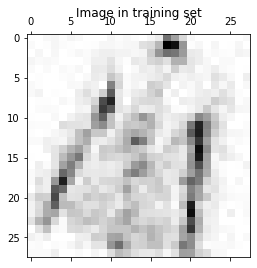

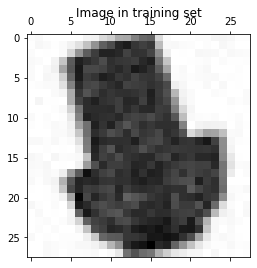

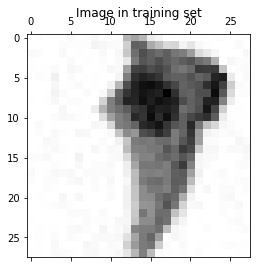

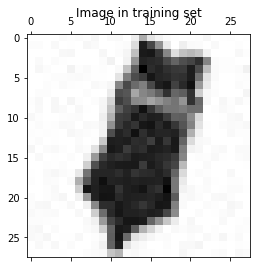

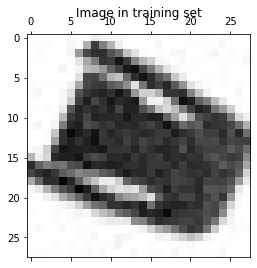

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
# first 5 images of training data
for i in range(5):
    train_img = np.reshape(Xtrain[i],(28,28))
    plt.matshow(train_img,cmap="Greys")
    plt.title("Image in training set")
    plt.show()

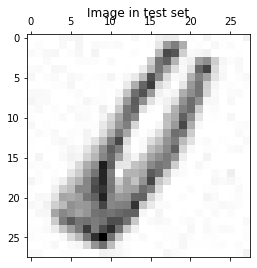

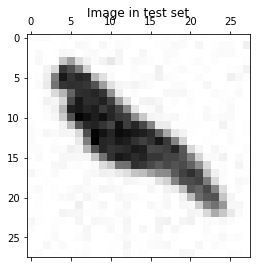

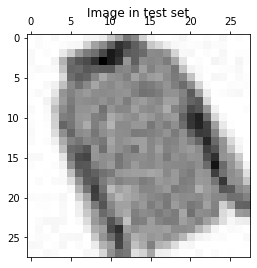

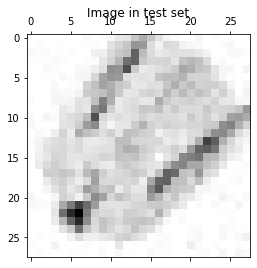

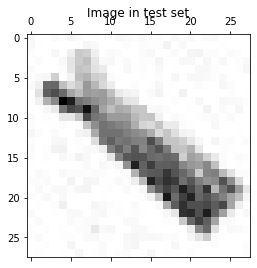

In [5]:
#displaying the five images in test set
for i in range(5):
    test_image = np.reshape(Xtest[i], (28,28))
    plt.matshow(test_image,cmap="Greys")
    plt.title("Image in test set")
    plt.show()

<b>Part 2</b>

In [6]:
negative_count = np.count_nonzero(Ytrain == -1)
positive_count = np.count_nonzero(Ytrain == 1)
print("Positive labels count in training dataset:",positive_count)
print("Negative labels count in training dataset:",negative_count)

Positive labels count in training dataset: 1179
Negative labels count in training dataset: 1821


<b>Part 3</b>

<h4>Which performance metric should be used?</h4>
<br>
tp = True positive(correctly identified)
<br>
tn = True negative(correctly rejected prediction)
<br>
fp = False positive(incorrectly identified predictions)
<br>
fn = False negative(incorrectly rejected for specific class)
<br>
<br>
The three evaluation metrics "Accuracy","ROC - AUC curve" , "AUC -PR curve" has underlying assumptions. The best measure in general depends on the different scenarios and needs.
<h4>Accuracy</h4>
<ul>
<li>For a given threshold,Accuracy calculates tp+tn/tp+tn+fp+fn i.e., It calculates the proportion of properly classified instances by the model among all the instances in the data set. 
<li>Accuracy is good metric for classification,when classes in dataset are well balanced and not skewed.
<li>when dataset is imbalanced, where 90% positive labels and 10% negative labels  or vice-versa.
The model can achieve a high classification accuracy by predicting all the obseravtions as the majority class.
<li>The accuracy of classifier is based on the threshold. The threshold yields the output of classifier labels. 
<li>when the threshold value is equal to 0(zero) , the real value outputs from the model greater than '0' are classified as positive labels and the real value outputs less than zero are classified as negative labels.
<li> when the value of threshold changes the false positive(fp) and false negative(fn) values can increase . 
</ul>
<h4>ROC - AUC curve </h4>
<ul>
<li>ROC - AUC curve provides the trade - off curve between true positive rate and false positive rate
<li>The higher true positive rate and lower false positive rate is ideal and considered as a good model  .
    ROC - AUC score is metric that calculates the correlation between predictions and target.
<li>When data is heavily imbalanced,the ROC-AUC curve may not be ideal to use, since the value of false positive rate can go low due to the presence of large number of TN(true negatives) in heavily imbalaced class. 
<li> ROC - Curve is the best metric,  when we care about "true negatives" as much as "true positives" in a imbalanced dataset
</ul>
<h4> AUC - PR curve </h4>
<ul>
<li>For every threshold , we plot precision on y- axis and recall on x - axis . The higher presicion and lower the recall in a model is considered to be the best and ideal. 
<li>AUC - PR is best evaluation metric to know at which recall , the presicion is started to get low. This information will help us to pick the 'threshold value' to make best model. 
<li>AUC - PR curve is best when data is heavily imabalance since it mainly concentrates on positive class. 
</ul>
Precision  = tp/tp+fp
recall = true positive rate = tp/tp+fn

<b>Since Our training data is fairly balanced with 40% positive labels and 60% negative labels ,Both Accuracy and ROC - AUC curve are suitable to use.</b>

<b>Part 4</b>

In [7]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import *
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve,auc
from sklearn.metrics import average_precision_score

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Xtrain, Ytrain)
dummy = DummyClassifier(strategy ='uniform')
dummy.fit(X_train,y_train)
pred_train = dummy.predict(X_train)
pred = dummy.predict(X_val)
print("Training accuracy score:",dummy.score(pred_train,y_train))
print("Test accuracy score:",dummy.score(pred,y_val))

Training accuracy score: 0.5133333333333333
Test accuracy score: 0.5213333333333333


For a binary classification with 2 classes positive(+1) and negative(-1). the probability (postive) is positive classes 40 % and probaility (negative)  is 60%
<br>

The accuracy  = probability(postive) * probability(predicted positve) + probability(negative) * probability(predicted negative)
<br>

when the data set is failrly balanced or balanced,the accuracy  of random classifier is always 1/k where k is the number of classes in dataset.

<br>
Thus,for our dataset , which is fairly balanced , the training accuracy and validation accuracy is 
<br>

probability(predicted positive) == probability(predicted negative) == 1/2 == 0.5 approximately.

<b>Part 5</b>

<b>AUC-ROC curve</b>

AUC - ROC evaluates the classification accuracy score where the true positive rate TPR is plotted against the false positive rate FPR 

In [8]:
prediction_probability = dummy.predict_proba(X_val)
prediction_probability_train = dummy.predict_proba(X_train)
fpr, tpr,tt = roc_curve(y_val, prediction_probability[:, 1])
fpr_train,tpr_train,tt_train = roc_curve(y_train, prediction_probability_train[:, 1])
roc_auc = auc(fpr, tpr)
roc_auc_train = auc(fpr_train,tpr_train)
print("ROC - AUC training score:",roc_auc_train)
print("ROC - AUC test score:",roc_auc)

ROC - AUC training score: 0.5
ROC - AUC test score: 0.5


AUC _ ROC curve is the curve of plotting True positive rate (TPR) and False positive rate(FPR)

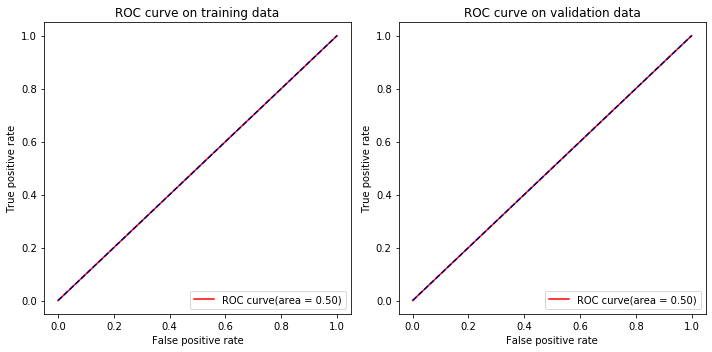

In [9]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(fpr_train, tpr_train,color='red',label='ROC curve(area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('ROC curve on training data')
plt.legend(loc = "lower right")

plt.subplot(1,2,2)
plt.plot(fpr, tpr,color='red',label='ROC curve(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('ROC curve on validation data')
plt.legend(loc = "lower right")

plt.tight_layout()
plt.show()

From the above plots, we can see that on our training dataset and validation dataset random classifier  have an AUC close to 0.5 i.e., for every correct prediction, the following prediction tends be incorrect.Random classifier assigns both positive and negative classifier with probability of 1/2 == 0.5

<b>AUC - PR curve</b>

Presicion - Recall Area under the curve score on training data 0.3831111111111111
Presicion - Recall Area under the curve score on validation data 0.4226666666666667


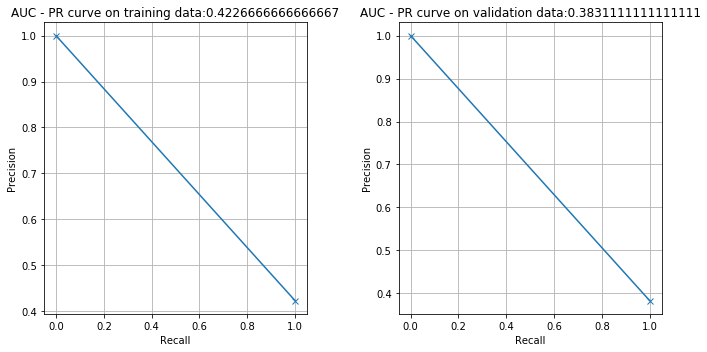

In [10]:
prediction_probability_pr = dummy.predict_proba(X_val)
prediction_probability_pr_train = dummy.predict_proba(X_train)
# specifying probability  on validation data
P,R,tt = precision_recall_curve(y_val, prediction_probability_pr[:,1])
pr_auc = average_precision_score(y_val, prediction_probability_pr[:,1])
# specifying probability on Training data
P_train,R_train,tt_train = precision_recall_curve(y_train, prediction_probability_pr_train[:,1])
pr_auc_train = average_precision_score(y_train, prediction_probability_pr_train[:,1])
#printing the PR- AUC scores of both training and validation data 
print("Presicion - Recall Area under the curve score on training data",pr_auc_train)
print("Presicion - Recall Area under the curve score on validation data",pr_auc)

plt.figure(figsize = (10,5))

plt.subplot(1,2,1) #sub plot of training data
plt.plot(R,P,'x-');
plt.xlabel('Recall');
plt.ylabel('Precision');
plt.grid();
plt.title('AUC - PR curve on training data:'+str(pr_auc))


plt.subplot(1,2,2)#sub plot of validation data 
plt.plot(R_train,P_train,'x-');
plt.xlabel('Recall');
plt.ylabel('Precision');
plt.grid();
plt.title('AUC - PR curve on validation data:'+str(pr_auc_train))


plt.tight_layout()
plt.show()

Precision = True Positives / (True Positives + False Positives) 
<br>

Recall = True Positives / (True Positives + False Negatives)
<br>

PR curve is the plot for each threshold of Precision and Recall 
<br>

For the random classifier on our training and validation set ,the PR curve line changes based on the postive class and negative class distribution in dataset 
<br>

For a balanced dataset, the PR curve score will be 0.5 because the distribution of postive and negative classes distribution is equal (50 -50) 

<br>
Since our data set has 40% positive instances and 60% negative instances and we predicting the relevent classes that are actually relevent using the function : dummy.predict_proba(X_val)[:,1] .

The Presicion_recall_score for the random classifier on our training dataset is 0.4.


<h3>Question - 2</h3>

Cross-validation is used to evaluate the model accuarcy on unseen data. by using a small sample in order to estimate the performance of model ,
<br>
when the sample has been only used to make predictions on the model and was not used to train the model.

Starified 5 fold cross validation, takes an small sample data by computing ( 3000/5 == 600) , train on 2400 and test on 600 and pick different set of samples everytime it iterates 
<br>

It make sure you have good proption of positive and negative classes in both validation and train dataset to avoid class imbalannce.
 

<b>Part 1</b>

Predicted Accuracy Score of 0 fold : 0.7587354409317804
Roc_Auc score of 0 fold: 0.7497039702809379
Auc_Presicion_recall score of 0 fold: 0.6011202934543193


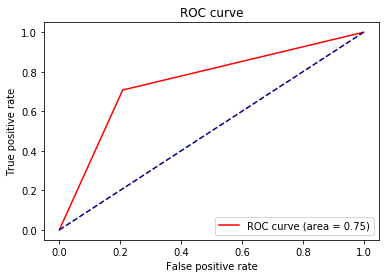

---------------------------END OF FOLD 0 ----------------------------------
Predicted Accuracy Score of 1 fold : 0.7533333333333333
Roc_Auc score of 1 fold: 0.7520022350530825
Auc_Presicion_recall score of 1 fold: 0.5971751412429378


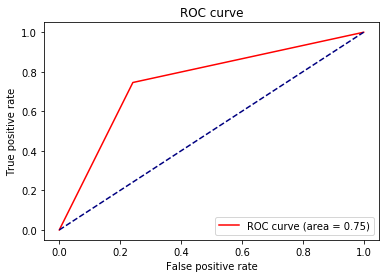

---------------------------END OF FOLD 1 ----------------------------------
Predicted Accuracy Score of 2 fold : 0.72
Roc_Auc score of 2 fold: 0.7081393183088098
Auc_Presicion_recall score of 2 fold: 0.5553813559322034


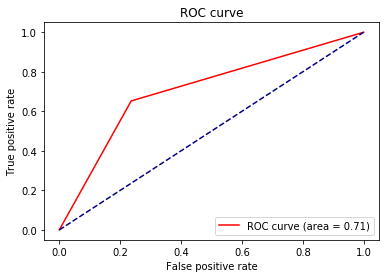

---------------------------END OF FOLD 2 ----------------------------------
Predicted Accuracy Score of 3 fold : 0.78
Roc_Auc score of 3 fold: 0.7717452039485938
Auc_Presicion_recall score of 3 fold: 0.6290404818602044


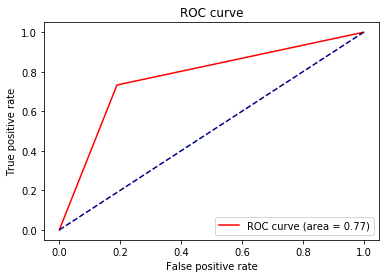

---------------------------END OF FOLD 3 ----------------------------------
Predicted Accuracy Score of 4 fold : 0.7395659432387313
Roc_Auc score of 4 fold: 0.7329319616553659
Auc_Presicion_recall score of 4 fold: 0.5784194589524543


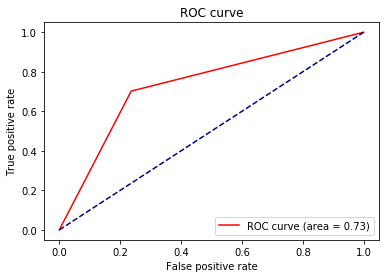

---------------------------END OF FOLD 4 ----------------------------------


In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import auc,accuracy_score,classification_report,roc_curve,roc_auc_score,precision_recall_curve,average_precision_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
# defined the list to append the results
acc_scores = []
auc_roc = []
auc_pr = []
false_pr = []
true_pr = []
# Create train and test sets
skfold = StratifiedKFold(n_splits=5,random_state=None, shuffle=True)
for train_index, test_index in skfold.split(Xtrain,Ytrain):
    # X is the training data set and y is the target set
    X_train, X_val, y_train, y_val = Xtrain[train_index], Xtrain[test_index], Ytrain[train_index], Ytrain[test_index]
    
    #initialising the classifier with k - value = 1
    kn_classifier = KNeighborsClassifier(n_neighbors=1) 
    # Fitting the Knn classifier on training data
    kn_classifier.fit(X_train, y_train)
    pred = kn_classifier.predict(X_val)#predicting the validating set.
    acc_scores.append(accuracy_score(pred,y_val))
    prediction_probability = kn_classifier.predict_proba(X_val) #specifying the probability of  test data 
    # calculates FPR and TPR for a number of thresholds on postive classes
    false_positive_rate, true_positive_rate,thresholds = roc_curve(y_val, prediction_probability[:, 1])
    false_pr.append(false_positive_rate)
    true_pr.append(true_positive_rate)
     # given points on a curve, this calculates the area under it
    auc_roc.append(auc(false_positive_rate, true_positive_rate))
    #calculating presicion , recall for a number of thresholds on positive classes
    precision, recall, thresholds = precision_recall_curve(y_val, prediction_probability[:, 1])
    # given points on a curve, this calculates the area under it
    auc_pr.append(average_precision_score(y_val, prediction_probability[:, 1]))
for i in range(len(acc_scores)) :
    print("Predicted Accuracy Score of",i,"fold :",acc_scores[i])
    print("Roc_Auc score of",i,"fold:",auc_roc[i])
    print("Auc_Presicion_recall score of",i,"fold:",auc_pr[i])
    
    plt.figure()
     #plotting the ROC - AUC curve of each fold
    plt.plot(false_pr[i],true_pr[i],color='red',label='ROC curve (area = %0.2f)' % auc_roc[i])
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title('ROC curve')
    plt.legend(loc = "lower right")
    
    plt.show()
    print("---------------------------END OF FOLD",i,"----------------------------------")


From ROC curve , It can seen that the covered area (AUC) is small , 

Ideally the bigger the AUC(Area under curve) , the better the model is at properly seperating the positive and negative classes.

with n_neighbour = 1 , knn classifier is not able to properly distingush the classes well on training data.

<b>Part 2</b>

In [12]:
import statistics as st
print("-----------------MEAN---------------------------------")
print(" Mean Accuracy score of each fold:",st.mean(acc_scores))
print(" Mean Roc_Auc score of each fold:",st.mean(auc_roc))
print(" Mean Auc_Presicion_recall score for each fold:",st.mean(auc_pr))
print("--------------STANDARD DEVIATION-----------------------")
print(" Standard deviation Accuracy score of each fold:",st.stdev(acc_scores))
print(" Standard deviation Roc_Auc score of each fold:",st.stdev(auc_roc))
print(" Standard deviation Auc_Presicion_recall score for each fold:",st.stdev(auc_pr))

-----------------MEAN---------------------------------
 Mean Accuracy score of each fold: 0.750326943500769
 Mean Roc_Auc score of each fold: 0.742904537849358
 Mean Auc_Presicion_recall score for each fold: 0.5922273462884239
--------------STANDARD DEVIATION-----------------------
 Standard deviation Accuracy score of each fold: 0.022336931971611726
 Standard deviation Roc_Auc score of each fold: 0.02381626105467322
 Standard deviation Auc_Presicion_recall score for each fold: 0.02741831911718486


<b>Part 3</b>

<b>Data Preprocessing:</b>

<b>KNN classifier with different preprocessing techniques</b>

<h4>Scaling data :</h4>

<ul>
<li>We need to normalize the all values to 0 , 1 .
<li>since the images are stored in pixel format, where each number is between 0 - 255. 
<li>0 is black and 255 is white , all the values are in between associated with grey's.
<li>This will be the only modification we will make to the image
</ul>

In [13]:
train_norm = Xtrain.astype('float32')
test_norm = Xtest.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [14]:
#lists to append the prediction scores
ac_norm= []
auc_norm = []
auc_pr_norm = []

# splitting the data into train and test sets using stratified five fold cross validation
for train_index, test_index in skfold.split(train_norm,Ytrain):
    X_train, X_val, y_train, y_val = train_norm[train_index], train_norm[test_index], Ytrain[train_index], Ytrain[test_index]
    # X is the training data set and y is the target set
    kn_classifier = KNeighborsClassifier(n_neighbors=1) 
    kn_classifier.fit(X_train, y_train) # fit the KNN classifier
    #predicting the classes on unseen validation data
    pred = kn_classifier.predict(X_val)
    ac_norm.append(accuracy_score(pred,y_val))
    #predict the prbabilities
    prediction_probability = kn_classifier.predict_proba(X_val)
    #computing the roc - auc score for positive class using prediction probaility
    false_positive_rate, true_positive_rate,thresholds = roc_curve(y_val, prediction_probability[:, 1])
    auc_norm.append(auc(false_positive_rate,true_positive_rate))
    #calculating auc - pr score
    precision, recall, thresholds = precision_recall_curve(y_val, prediction_probability[:, 1])
    auc_pr_norm.append(average_precision_score(y_val, prediction_probability[:, 1]))
print("--------------------------Mean-----------------------------")
print("Mean Accuracy:",st.mean(ac_norm))
print("Mean Roc_AUC curve score:",st.mean(auc_norm))
print("Mean AUC_PR:",st.mean(auc_pr_norm))
print("----------------------Standard Deviation--------------------")
print("Standard deviation of Accuracy across each fold:",st.stdev(ac_norm))
print("Standard deviation of Roc_AUC curve score across each fold:",st.stdev(auc_norm))
print("Standard deviation of AUC_PR across each fold:",st.stdev(auc_pr_norm))

--------------------------Mean-----------------------------
Mean Accuracy: 0.7519941888727468
Mean Roc_AUC curve score: 0.7475733798185867
Mean AUC_PR: 0.5950327537332067
----------------------Standard Deviation--------------------
Standard deviation of Accuracy across each fold: 0.022378214139928795
Standard deviation of Roc_AUC curve score across each fold: 0.023625579530116764
Standard deviation of AUC_PR across each fold: 0.026297970538902805


Lets try min-Max scalar to rescale the units of mesurements of data.

<h5>Min-Max scalar:</h5>

x - x(min) / x(max) - x(min)

It scales the features between 0 and 1. to preserve the zero entities in sparse data . 

In [15]:
from sklearn.preprocessing import MinMaxScaler
#initialising the minmax scalar
min_max = MinMaxScaler()
min_max.fit(Xtrain) #minmax fit to the train data
#transforming the sclaing to the traindata and test data 
Xtrian_minmax = min_max.transform(Xtrain)
Xtest_minmax = min_max.transform(Xtest)
#list data structure to store the accuracy , auc - roc ,PR scores
ac_minmax = []
auc_minmax = []
auc_pr_minmax = []
#cross validation with 5 fold startified 
for train_index, test_index in skfold.split(Xtrian_minmax,Ytrain):
    X_train, X_val, y_train, y_val = Xtrian_minmax[train_index], Xtrian_minmax[test_index], Ytrain[train_index], Ytrain[test_index]
    #initilalising the KNN classifier
    kn_classifier = KNeighborsClassifier(n_neighbors=1) 
    #training the data 
    kn_classifier.fit(X_train, y_train)
    #predicting on unseen validation data
    pred = kn_classifier.predict(X_val)
    ac_minmax.append(accuracy_score(pred,y_val))
    #predict probabilities
    prediction_probability = kn_classifier.predict_proba(X_val)
    #calculating the roc - auc of probaility of postive class 
    false_positive_rate, true_positive_rate,thresholds = roc_curve(y_val, prediction_probability[:, 1])
    auc_minmax.append(auc(false_positive_rate,true_positive_rate))
    #calculating the presicion - recall curve
    precision, recall, thresholds = precision_recall_curve(y_val, prediction_probability[:, 1])
    auc_pr_minmax.append(average_precision_score(y_val, prediction_probability[:, 1]))
print("-----------------------------Mean-----------------------------------")
print("Mean Accuracy:",st.mean(ac_minmax))
print("Mean Roc_AUC curve score:",st.mean(auc_minmax))
print("Mean AUC_PR:",st.mean(auc_pr_minmax))
print("-------------------------------Standard Deviation----------------------")
print("Standard deviation of Accuracy across each fold:",st.mean(ac_minmax))
print("Standard deviation of ROC - AUC score across each fold:",st.mean(auc_minmax))
print("Standard deviation of AUC - PR across each fold:",st.mean(auc_pr_minmax))

-----------------------------Mean-----------------------------------
Mean Accuracy: 0.7496630481380967
Mean Roc_AUC curve score: 0.7404093401029116
Mean AUC_PR: 0.5906427474233789
-------------------------------Standard Deviation----------------------
Standard deviation of Accuracy across each fold: 0.7496630481380967
Standard deviation of ROC - AUC score across each fold: 0.7404093401029116
Standard deviation of AUC - PR across each fold: 0.5906427474233789


<h5>MaxAbs scalar</h5>

Maxabs sclars works similarly as MIN - Max scalars ,
but it transform the data into [-1 , 1 ] range by dividing with maximun value . It is meant for data that is already centerd at 0 and sparse data.

In [16]:
import statistics as st #importing statistics module to compute mean and standrad deviation 
from sklearn.preprocessing import MaxAbsScaler
#fit the max abs scalar to training data 
min_max_abs = MaxAbsScaler()
min_max_abs.fit(Xtrain)
#transforming the training data  and test with scaling featues
Xtrian_minmax_abs = min_max_abs.transform(Xtrain)
Xtest_minmax_abs = min_max_abs.transform(Xtest)
ac_minmax_abs = []
auc_minmax_abs = []
auc_pr_minmax_abs = []
# splitting the train and validatuon set using stratified k fold cross validation 
for train_index, test_index in skfold.split(Xtrian_minmax_abs,Ytrain):
    X_train, X_val, y_train, y_val = Xtrian_minmax_abs[train_index], Xtrian_minmax_abs[test_index], Ytrain[train_index], Ytrain[test_index]
    kn_classifier = KNeighborsClassifier(n_neighbors=1) 
    kn_classifier.fit(X_train, y_train) #fit a model 
    pred = kn_classifier.predict(X_val) #predicting the unseen classes
    ac_minmax_abs.append(accuracy_score(pred,y_val))
    #predict the probailities 
    prediction_probability = kn_classifier.predict_proba(X_val)
    #predict the probabilities of postive outcome only and calculate the roc- auc score
    false_positive_rate, true_positive_rate,thresholds = roc_curve(y_val, prediction_probability[:, 1])
    auc_minmax_abs.append(auc(false_positive_rate,true_positive_rate))
    #predict the probabilities of postive outcome only and calculate the AUC - PR score
    precision, recall, thresholds = precision_recall_curve(y_val, prediction_probability[:, 1])
    auc_pr_minmax_abs.append(average_precision_score(y_val, prediction_probability[:, 1]))
print("----------------------Mean--------------------------")
print("Mean Accuracy:",st.mean(ac_minmax_abs))
print("Mean Roc_AUC curve score:",st.mean(auc_minmax_abs))
print("Mean AUC_PR:",st.mean(auc_pr_minmax_abs))
print("-------------------Standrad deviation------------")
print("Standard deviation of Accuracy across each fold:",st.stdev(ac_minmax_abs))
print("Standard deviation of ROC - AUC score across each fold:",st.stdev(auc_minmax_abs))
print("Standard deviation of AUC - PR across each fold:",st.stdev(auc_pr_minmax_abs))

----------------------Mean--------------------------
Mean Accuracy: 0.7449936175748636
Mean Roc_AUC curve score: 0.7371512187776162
Mean AUC_PR: 0.5854686431328646
-------------------Standrad deviation------------
Standard deviation of Accuracy across each fold: 0.01331359120232192
Standard deviation of ROC - AUC score across each fold: 0.012381298851172787
Standard deviation of AUC - PR across each fold: 0.01526410090776522


<h5>Standard scalar :</h5>

The problem can be resolved by using a data standardization method, data points
can be standardized using z - score (x -mean/standard deviation).
If we standardize the data, we can resolve the inconsistency caused by different ranges of data.

<b>But standardising removes the mean and makes the data into gaussian distribution.</b>

In [17]:
from  sklearn.preprocessing import StandardScaler
#Apply standard scaling 
pre_scaler = StandardScaler()
pre_scaler.fit(Xtrain)
# Apply transform to both the training set and the test set.
X_train_scale= pre_scaler.transform(Xtrain)
X_test_scale = pre_scaler.transform(Xtest)
ac_stan = []
auc_stan = []
auc_pr_stan = []
#split the data into validation and test set using startified k fold cross validation 
for train_index, test_index in skfold.split(X_train_scale,Ytrain):
    X_train, X_val, y_train, y_val = X_train_scale[train_index], X_train_scale[test_index], Ytrain[train_index], Ytrain[test_index]
    kn_classifier = KNeighborsClassifier(n_neighbors=1)
    kn_classifier.fit(X_train, y_train)# fit a model on training data 
    pred = kn_classifier.predict(X_val)# predcit the classes on unseen data
    ac_stan.append(accuracy_score(pred,y_val))
    #predict the probability 
    prediction_probability = kn_classifier.predict_proba(X_val)
    #computes AUC - ROC score on predcitive probaility of positive classes
    false_positive_rate, true_positive_rate,thresholds = roc_curve(y_val, prediction_probability[:, 1])
    auc_stan.append(auc(false_positive_rate, true_positive_rate))
    #computes AUC - PR score on predcitive probaility of positive classes
    precision, recall, thresholds = precision_recall_curve(y_val, prediction_probability[:, 1])
    auc_pr_stan.append(average_precision_score(y_val, prediction_probability[:, 1]))
print("-----------------MEAN---------------------------------")
print(" Mean Accuracy score of each fold:",st.mean(ac_stan))
print(" Mean Roc_Auc score of each fold:",st.mean(auc_stan))
print(" Mean Auc_Presicion_recall score for each fold:",st.mean(auc_pr_stan))
print("--------------STANDARD DEVIATION-----------------------")
print(" Standard deviation Accuracy score of each fold:",st.stdev(ac_stan))
print(" Standard deviation Roc_Auc score of each fold:",st.stdev(auc_stan))
print(" Standard deviation Auc_Presicion_recall score for each fold:",st.stdev(auc_pr_stan))

-----------------MEAN---------------------------------
 Mean Accuracy score of each fold: 0.7529886092276182
 Mean Roc_Auc score of each fold: 0.7449289863617357
 Mean Auc_Presicion_recall score for each fold: 0.5948555250522948
--------------STANDARD DEVIATION-----------------------
 Standard deviation Accuracy score of each fold: 0.012888038757321488
 Standard deviation Roc_Auc score of each fold: 0.015381756145331263
 Standard deviation Auc_Presicion_recall score for each fold: 0.01639480562734199


<h5>Robust scalar </h5>

If the data contains many outliers, scaling using the mean and variance of the data doesn't work very well since scaling takes the mean and  standard deviation and outliers may impact those values and give biased result. 
In these cases,  robust_scale and RobustScaler can be used for drop-in replacements instead. 
Robust scalar use more robust estimates for the center and range of the data.

In [18]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
robust_scaler.fit(Xtrain)
# Apply transform to both the training set and the test set.
X_train_scale_robust= robust_scaler.transform(Xtrain)
X_test_scale_robust = robust_scaler.transform(Xtest)
ac_stan_robust = []
auc_stan_robust = []
auc_pr_stan_robust = []
#split the data into validation and test set using startified k fold cross validation 
for train_index, test_index in skfold.split(X_train_scale_robust,Ytrain):
    X_train, X_val, y_train, y_val = X_train_scale_robust[train_index], X_train_scale_robust[test_index], Ytrain[train_index], Ytrain[test_index]
    kn_classifier = KNeighborsClassifier(n_neighbors=1)
    kn_classifier.fit(X_train, y_train)#fit a model
    pred = kn_classifier.predict(X_val)#predict the classes of validation data
    ac_stan_robust.append(accuracy_score(pred,y_val))
    #predic the probability of validation data set classes
    prediction_probability = kn_classifier.predict_proba(X_val)
    #computes AUC - ROC score on predcitive probaility of positive classes
    false_positive_rate, true_positive_rate,thresholds = roc_curve(y_val, prediction_probability[:, 1])
    auc_stan_robust.append(auc(false_positive_rate, true_positive_rate))
    #computes AUC - PR score on predcitive probaility of positive classes
    precision, recall, thresholds = precision_recall_curve(y_val, prediction_probability[:, 1])
    auc_pr_stan_robust.append(average_precision_score(y_val, prediction_probability[:, 1]))
print("-----------------MEAN---------------------------------")
print(" Mean Accuracy score of each fold:",st.mean(ac_stan_robust))
print(" Mean Roc_Auc score of each fold:",st.mean(auc_stan_robust))
print(" Mean Auc_Presicion_recall score for each fold:",st.mean(auc_pr_stan_robust))
print("--------------STANDARD DEVIATION-----------------------")
print(" Standard deviation Accuracy score of each fold:",st.stdev(ac_stan_robust))
print(" Standard deviation Roc_Auc score of each fold:",st.stdev(auc_stan_robust))
print(" Standard deviation Auc_Presicion_recall score for each fold:",st.stdev(auc_pr_stan_robust))

-----------------MEAN---------------------------------
 Mean Accuracy score of each fold: 0.7473391657569419
 Mean Roc_Auc score of each fold: 0.7371818888717406
 Mean Auc_Presicion_recall score for each fold: 0.5875765774072268
--------------STANDARD DEVIATION-----------------------
 Standard deviation Accuracy score of each fold: 0.012412090694412774
 Standard deviation Roc_Auc score of each fold: 0.015255182868404757
 Standard deviation Auc_Presicion_recall score for each fold: 0.015254913449845657


<b>Non Linear transformations </b>
<br>
<br>
<b>quantile transformer</b>

In [19]:
from sklearn.preprocessing import QuantileTransformer
Qt = QuantileTransformer()
Qt.fit(Xtrain)
# Apply transform to both the training set and the test set.
X_train_qt= Qt.transform(Xtrain)
X_test_qt= Qt.transform(Xtest)
ac_qt = []
auc_qt = []
auc_pr_qt = []
#split the data into validation and test set using startified k fold cross validation 
for train_index, test_index in skfold.split(X_train_qt,Ytrain):
    X_train, X_val, y_train, y_val = X_train_qt[train_index], X_train_qt[test_index], Ytrain[train_index], Ytrain[test_index]
    
    kn_classifier_qt = KNeighborsClassifier(n_neighbors=1)#initilasie the KNN classifier with K value = 1
    kn_classifier_qt.fit(X_train, y_train)#fit a model
    pred = kn_classifier_qt.predict(X_val)#predict the labels of unseen data 
    ac_qt.append(accuracy_score(pred,y_val))
    #predcit the probabilities of all the classes 
    prediction_probability_qt = kn_classifier_qt.predict_proba(X_val)
    #predcit the probabilities of positive class and compute AUC - ROC score
    false_positive_rate, true_positive_rate,thresholds = roc_curve(y_val, prediction_probability_qt[:, 1])
    auc_qt.append(auc(false_positive_rate, true_positive_rate))
     #predcit the probabilities of positive class and compute AUC - PR score
    precision, recall, thresholds = precision_recall_curve(y_val, prediction_probability_qt[:, 1])
    auc_pr_qt.append(average_precision_score(y_val, prediction_probability_qt[:, 1]))
print("-----------------MEAN---------------------------------")
print(" Mean Accuracy score of each fold:",st.mean(ac_qt))
print(" Mean Roc_Auc score of each fold:",st.mean(auc_qt))
print(" Mean Auc_Presicion_recall score for each fold:",st.mean(auc_pr_qt))
print("--------------STANDARD DEVIATION-----------------------")
print(" Standard deviation Accuracy score of each fold:",st.stdev(ac_qt))
print(" Standard deviation Roc_Auc score of each fold:",st.stdev(auc_qt))
print(" Standard deviation Auc_Presicion_recall score for each fold:",st.stdev(auc_pr_qt))

-----------------MEAN---------------------------------
 Mean Accuracy score of each fold: 0.7566747120593854
 Mean Roc_Auc score of each fold: 0.7505168112395831
 Mean Auc_Presicion_recall score for each fold: 0.6000583405898053
--------------STANDARD DEVIATION-----------------------
 Standard deviation Accuracy score of each fold: 0.01747819086783729
 Standard deviation Roc_Auc score of each fold: 0.017518338947241342
 Standard deviation Auc_Presicion_recall score for each fold: 0.021194228537286978


<b>power transformer</b>

In [20]:
from sklearn.preprocessing import PowerTransformer
#use a prower tranformation, a non linear transformation method to preprocess the data 
import statistics as st
pt = PowerTransformer()
pt.fit(Xtrain)
# Apply transformation to both the training set and the test set.
X_train_pt= pt.transform(Xtrain)
X_test_pt= pt.transform(Xtest)
ac_pt = []
auc_pt = []
auc_pr_pt = []
#splitting the data into train and validation set using stratified five fold cross validation
for train_index, test_index in skfold.split(X_train_pt,Ytrain):
    X_train, X_val, y_train, y_val = X_train_pt[train_index], X_train_pt[test_index], Ytrain[train_index], Ytrain[test_index]
    kn_classifier = KNeighborsClassifier(n_neighbors=1)
    #fit a model
    kn_classifier.fit(X_train, y_train)
    #predict the labels of validation data 
    pred = kn_classifier.predict(X_val)
    ac_pt.append(accuracy_score(pred,y_val))
    #predict the probabilities of validation data 
    prediction_probability_pt = kn_classifier.predict_proba(X_val)
    #predcit the probabilities of positive class and compute AUC - ROC score
    false_positive_rate, true_positive_rate,thresholds = roc_curve(y_val, prediction_probability_pt[:, 1])
    auc_pt.append(auc(false_positive_rate, true_positive_rate))
     #predcit the probabilities of positive class and compute AUC - PR score
    precision, recall, thresholds = precision_recall_curve(y_val, prediction_probability_pt[:, 1])
    auc_pr_pt.append(average_precision_score(y_val, prediction_probability_pt[:, 1]))
    
print("-----------------MEAN---------------------------------")
print(" Mean Accuracy score of each fold:",st.mean(ac_pt))
print(" Mean Roc_Auc score of each fold:",st.mean(auc_pt))
print(" Mean Auc_Presicion_recall score for each fold:",st.mean(auc_pr_pt))
print("--------------STANDARD DEVIATION-----------------------")
print(" Standard deviation Accuracy score of each fold:",st.stdev(ac_pt))
print(" Standard deviation Roc_Auc score of each fold:",st.stdev(auc_pt))
print(" Standard deviation Auc_Presicion_recall score for each fold:",st.stdev(auc_pr_pt))

-----------------MEAN---------------------------------
 Mean Accuracy score of each fold: 0.7669964222122839
 Mean Roc_Auc score of each fold: 0.7615799939406241
 Mean Auc_Presicion_recall score for each fold: 0.6128384930027507
--------------STANDARD DEVIATION-----------------------
 Standard deviation Accuracy score of each fold: 0.014321931252194855
 Standard deviation Roc_Auc score of each fold: 0.013899003766868655
 Standard deviation Auc_Presicion_recall score for each fold: 0.017479313871232516


<b>Normalizer</b>

In [21]:
from sklearn.preprocessing import Normalizer
Norm = Normalizer()
Norm.fit(Xtrain)
# Apply transform to both the training set and the test set.
X_train_Norm= Norm.transform(Xtrain)
X_test_Norm= Norm.transform(Xtest)
ac_Norm = []
auc_Norm = []
auc_pr_Norm = []
#split the data into train set and validation set using five fold stratified cross validation 
skfold = StratifiedKFold(n_splits=5,random_state=None, shuffle=True)
for train_index, test_index in skfold.split(X_train_Norm,Ytrain):
    X_train, X_val, y_train, y_val = X_train_Norm[train_index], X_train_Norm[test_index], Ytrain[train_index], Ytrain[test_index]
    kn_classifier = KNeighborsClassifier(n_neighbors=1)#knn classifier with k - value = 1
    # fit a knn classifier on training dataset
    kn_classifier.fit(X_train, y_train)
    pred = kn_classifier.predict(X_val)# predict the validation data and evaluate the accuracy score of the model 
    ac_Norm.append(accuracy_score(pred,y_val))
    #predict the probabilities of validation data 
    prediction_probability_Norm = kn_classifier.predict_proba(X_val)
     #predcit the probabilities of positive class and compute AUC - ROC score
    false_positive_rate, true_positive_rate,thresholds = roc_curve(y_val, prediction_probability_Norm[:, 1])
    auc_Norm.append(auc(false_positive_rate, true_positive_rate))
     #predcit the probabilities of positive class and compute AUC - PR score
    precision, recall, thresholds = precision_recall_curve(y_val, prediction_probability_Norm[:, 1])
    auc_pr_Norm.append(average_precision_score(y_val, prediction_probability_Norm[:, 1]))
#print the mean and standard deviation values of accuracy , AUC - ROC scores , AUC - PR score
print("-----------------MEAN---------------------------------")
print(" Mean Accuracy score of each fold:",st.mean(ac_Norm))
print(" Mean Roc_Auc score of each fold:",st.mean(auc_Norm))
print(" Mean Auc_Presicion_recall score for each fold:",st.mean(auc_pr_Norm))
print("--------------STANDARD DEVIATION-----------------------")
print(" Standard deviation Accuracy score of each fold:",st.stdev(ac_Norm))
print(" Standard deviation Roc_Auc score of each fold:",st.stdev(auc_Norm))
print(" Standard deviation Auc_Presicion_recall score for each fold:",st.stdev(auc_pr_Norm))

-----------------MEAN---------------------------------
 Mean Accuracy score of each fold: 0.7743186425517848
 Mean Roc_Auc score of each fold: 0.7731283797292867
 Mean Auc_Presicion_recall score for each fold: 0.6228793007394691
--------------STANDARD DEVIATION-----------------------
 Standard deviation Accuracy score of each fold: 0.01930414313465226
 Standard deviation Roc_Auc score of each fold: 0.020626938235390333
 Standard deviation Auc_Presicion_recall score for each fold: 0.024553224655690997


<b>Table to compare different preproceesing techniques applied on KNN classifier </b>

<table border="1">
  <tr>
    <th>KNN classifier with different Preprocessing techniques</th>
    <th>Mean Accuracy</th>
    <th>Mean ROC - AUC score</th>
    <th>Mean AUC - PR score</th>
  </tr>
  <tr>
    <td>Scaling data by didviding the pixels with 255</td>
    <td>0.75</td>
    <td>0.74</td>
    <td>0.59</td>
   </tr>
  <tr>
    <td>Min-Max scalar</td>
    <td>0.74</td>
    <td>0.73</td>
    <td>0.58</td>
  </tr>
  <tr>
    <td>Max Abs Scalar</td>
    <td>0.74</td>
    <td>0.73</td>
    <td>0.58</td>
  </tr>
  <tr>
    <td>Standard scalar</td>
    <td>0.76</td>
    <td>0.75</td>
    <td>0.60</td>
  </tr>
  <tr>
    <td>Robust Scalar</td>
    <td>0.74</td>
    <td>0.73</td>
    <td>0.58</td>
  </tr>
  <tr>
    <td>Quantile transformer(non-linear transformer)</td>
    <td>0.76</td>
    <td>0.75</td>
    <td>0.60</td>
  </tr>
  <tr>
    <td>Power transformer(non-linear transformer)</td>
    <td>0.77</td>
    <td>0.76</td>
    <td>0.61</td>
  </tr>
  <tr>
    <td>Normalizer</td>
    <td>0.76</td>
    <td>0.76</td>
    <td>0.60</td>
  </tr>
</table>


From the above table , we can observe that Power transformer preprocessing techniques gave the best Accuracy , ROC - AUC and AUC - PR , when compared to other preprocessing techniques.
<br>

Power transformer stabilizes the variance and minimizes the skewness by calculating the maximum likelihood.Power transformation is best, when there are issues to handle with non - constant variance or normalisation for the data
<br>

Since KNN Classifier computes euclidean distance to classify the data. we want to have all features in the dataset on the same scale because there might be some variables on “larger measurement scales”. 
<br>

Euclidean distance is problematic when handling with uncorrelated features / variables


<b>Part 4<b>

n_neighbours value will effect the performance of algorithm .
Classification is dependent on that value of n_neighbours because small changes in the value will varies large in classification.
Best way to pick the n_neighbours value is using cross validation . 

In [22]:
# from sklearn.model_selection import GridSearchCV
# import numpy as np
# #creating a knn model
# knn = KNeighborsClassifier()
# #creating a dictionary of 1 - 30 values to get the optimal k 
# param = {'n_neighbors':np.arange(1,30)}
# #startified 5 fold cross validation splitting train and validation test
# sk_fold = StratifiedKFold(n_splits=5, shuffle= True, random_state=None)
# #using GridSearch cv to test all optimal values for n_neighbours
# gs = GridSearchCV(knn,param,cv = sk_fold)
# #fit a model with training data 
# gs.fit(train_norm,Ytrain)
# print(gs.best_params_)#printing the best value for n_neighbors

<table>
  <tr>
    <th>The optimal value of k  </th>
    <th>Data Preprocessing technique</th>
  </tr>
    <tr><td>8</td><td>standard scalar</td></tr>
    <tr><td>16</td><td>max abs scalar</td></tr>
    <tr><td>16</td><td>for Scaling(divinding by 255)</td></tr>
    <tr><td>5</td><td>robust scalar</td></tr>
    <tr><td>16</td><td>Min max scalar</td></tr>
    <tr><td>5</td><td>quantile transformation</td></tr>
    <tr><td>6</td><td>Power transformation</td></tr>
    <tr><td>3</td><td>Normaliser</td></tr>
</table>

The power transformation with k = 6 has shown the good accuracy and roc - auc curve and auc - pr , 
The below code demonstrate the code of mean and standrad deviation of evaluation metrics with optimal k value 

In [23]:
pred_acc_24 = []
roc_auc_24 =[]
recall_pr_24 = []
skfold_knn = StratifiedKFold(n_splits=5,random_state= 123, shuffle= False)
for train_index, test_index in skfold_knn.split(X_train_pt,Ytrain):
    X_train, X_val, y_train, y_val = X_train_pt[train_index], X_train_pt[test_index], Ytrain[train_index], Ytrain[test_index]
    knn = KNeighborsClassifier(n_neighbors=6)#initialising knn classifier with k - value = 18
    knn.fit(X_train, y_train)#fit a model
    # predict the validation data and evaluate the accuracy score of the model 
    pred = knn.predict(X_val)
    pred_acc_24.append(accuracy_score(pred,y_val))
    #predict the probabilities of validation data
    prediction_probability = knn.predict_proba(X_val)
    #predcit the probabilities of positive class and compute AUC - ROC score
    false_positive_rate, true_positive_rate,thresholds = roc_curve(y_val, prediction_probability[:, 1])
    roc_auc_24.append(auc(false_positive_rate, true_positive_rate))
    #predcit the probabilities of positive class and compute AUC - ROC score
    precision, recall, thresholds = precision_recall_curve(y_val, prediction_probability[:, 1])
    recall_pr_24.append(average_precision_score(y_val, prediction_probability[:, 1]))
print("------------------------------Mean-----------------------------")
print("Mean predicted accuracy score of k value - 6 with power transformation :", st.mean(pred_acc_24))
print("Mean ROC-Auc score of k value 6 with power transformation:",st.mean(roc_auc_24))
print("Mean Presicion - Recall curve of optimal k value - 6 with power transformation:",st.mean(recall_pr_24))
print("------------------------------Standard deviation-------------------")
print("Standard deviation predicted accuracy score of k value - 6 with power transformation :", st.stdev(pred_acc_24))
print("Standard deviation ROC-Auc score of k value - 6 with power transformation:",st.stdev(roc_auc_24))
print("Standard deviation Presicion - Recall curve of optimal k value - 6 with power transformation:",st.stdev(recall_pr_24))

------------------------------Mean-----------------------------
Mean predicted accuracy score of k value - 6 with power transformation : 0.7723219833018055
Mean ROC-Auc score of k value 6 with power transformation: 0.8553754423813987
Mean Presicion - Recall curve of optimal k value - 6 with power transformation: 0.7443406337883367
------------------------------Standard deviation-------------------
Standard deviation predicted accuracy score of k value - 6 with power transformation : 0.02479606257655107
Standard deviation ROC-Auc score of k value - 6 with power transformation: 0.014952596887695057
Standard deviation Presicion - Recall curve of optimal k value - 6 with power transformation: 0.01895306968570601


Based on the Mean and standard deviation of the performance metrics, it can be identified that with k - value = 6 , the accuracy , ROC - AUC score , AUC - PR score has increased .

Standard deviation tell us ,on what level , the measurements are different from each other. The standard deviations of our metrics are relatively low .
low standard deviations indicates the high precision.

<h3>Question 3</h3>

<h4> Logistic Regression</h4>

In [24]:
#Grid search CV for logistic regression

In [25]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# from sklearn import metrics
# #initialising the logistic regression model
# logreg = LogisticRegression(class_weight='balanced')
# #selecting different parameters to hyper tune
# param = {'C':[0.001,0.005,0.01,0.05,1,3,5,10]}
# sk_fold = StratifiedKFold(n_splits=5, shuffle= True, random_state=None)
# #initialising the grid search to tune parameters with 5 fold cross validation 
# clf = GridSearchCV(logreg,param,refit=True,cv=sk_fold)
# #fit a model 
# clf.fit(X_train_scale,Ytrain)
# #compute the accuracy with best parameters
# print('Accuracy: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

<p>Initially grid search cv was run through the values 0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4,5,10 and with all the preprocessing techniques , that were used in Question - 2 , part 3</p>
    
<p>After several modifications were made to find the best fit parameter, It has been repetedly shown that the 0.001 as the best parameter for standard scalar with the best accuracy score of 0.72</p>


Logistic regression with standard scalar using startified k fold and hyper tuning parameter - 0.001

In [26]:
from sklearn.linear_model import LogisticRegression
accscore =[]
roccurve =[]
prcurve = []
skfold_lg = StratifiedKFold(n_splits=5,random_state= 123, shuffle= False)
#splitting the training data into train and validation set using stratified five fold cross validation
for train_index, test_index in skfold_lg.split(X_train_scale,Ytrain):
    X_train, X_val, y_train, y_val = X_train_scale[train_index], X_train_scale[test_index], Ytrain[train_index], Ytrain[test_index]
    lr_classification = LogisticRegression(C= 0.001, solver="lbfgs",class_weight='balanced') #initialising logistic regression with hyperparameter
    lr_classification.fit(X_train,y_train) #fit a model
    # predict the validation data and evaluate the accuracy score of the model 
    pred = lr_classification.predict(X_val)
    accscore.append(accuracy_score(pred,y_val))
    proba = lr_classification.predict_proba(X_val)[:,1]
    #predcit the probabilities of positive class and compute AUC - ROC score
    false_positive_rate,true_positive_rate, threshold = roc_curve(y_val,proba)
    roccurve.append(auc(false_positive_rate,true_positive_rate))
    #predcit the probabilities of positive class and compute AUC - PR score
    precision, recall, thresholds = precision_recall_curve(y_val,proba)
    prcurve.append(average_precision_score(y_val, proba))
#print the mean and standard deviation values of accuracy , AUC - ROC scores , AUC - PR score
print("--------------Mean-----------------")
print("Mean accuracy score:",st.mean(accscore))
print("Mean ROC - AUC score:",st.mean(roccurve))
print("Mean AUC - presicion recall score:",st.mean(prcurve))
print("-------------------------Standard Deviation---------------------------")
print("Standard deviation of accuracy score:",st.stdev(accscore))
print("Standard deviation of ROC - AUC score :",st.stdev(roccurve))
print("Standard deviation of AUC - presicion recall score:",st.stdev(prcurve))

--------------Mean-----------------
Mean accuracy score: 0.7146769139173534
Mean ROC - AUC score: 0.7881584777872735
Mean AUC - presicion recall score: 0.6267126476233146
-------------------------Standard Deviation---------------------------
Standard deviation of accuracy score: 0.01435413252390647
Standard deviation of ROC - AUC score : 0.013084764266307704
Standard deviation of AUC - presicion recall score: 0.018353812255045298


<h4>Naive Bayes Classifier</h4>

Particular NaiveBayes classifier was not specified in the assignment sheet , Therefore different naivebayes classifiers has been performed.

Since naive bayes doesnt take negative values - standard scalar , Maxabs scalar , Robust Scalar doesn't work 
Because naive bayes computes the probability of the images belongs to the class.

<b>Multinomial NaiveBayes</b>

In [27]:
accscore_mnb = []
roccurve_mnb = []
prcurve_mnb = []
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
skfold_NB = StratifiedKFold(n_splits=5,random_state= 123, shuffle= True)
#splitting the training data into train and validation set using stratified five fold cross validation
for train_index, test_index in skfold_NB.split(X_train_qt,Ytrain):
    X_train, X_val, y_train, y_val = X_train_qt[train_index], X_train_qt[test_index], Ytrain[train_index], Ytrain[test_index]
    
    MNB_classification =  MultinomialNB()
    MNB_classification.fit(X_train,y_train)#fit a model
    # predict the validation data and evaluate the accuracy score of the model
    pred = MNB_classification.predict(X_val)
    accscore_mnb.append(accuracy_score(pred,y_val))
    #predict the probabilities 
    proba_mnb = MNB_classification.predict_proba(X_val)[:,1]
    #predcit the probabilities of positive class and compute AUC - ROC score
    false_positive_rate,true_positive_rate, threshold = roc_curve(y_val,proba_mnb)
    roccurve_mnb.append(auc(false_positive_rate,true_positive_rate))
    #predcit the probabilities of positive class and compute AUC - PR score
    precision, recall, thresholds = precision_recall_curve(y_val,proba_mnb)
    prcurve_mnb.append(average_precision_score(y_val,proba_mnb))
 #print the mean and standard deviation values of accuracy , AUC - ROC scores , AUC - PR score   
print("--------------Mean-----------------")
print("Mean accuracy score:",st.mean(accscore_mnb))
print("Mean ROC - AUC score:",st.mean(roccurve_mnb))
print("Mean AUC - presicion recall score:",st.mean(prcurve_mnb))
print("-------------------------Standard Deviation---------------------------")
print("Standard deviation of accuracy score:",st.stdev(accscore_mnb))
print("Standard deviation of ROC - AUC score :",st.stdev(roccurve_mnb))
print("Standard deviation of AUC - presicion recall score:",st.stdev(prcurve_mnb))

--------------Mean-----------------
Mean accuracy score: 0.695000243519195
Mean ROC - AUC score: 0.7511698445728279
Mean AUC - presicion recall score: 0.6049693942826434
-------------------------Standard Deviation---------------------------
Standard deviation of accuracy score: 0.024489471305136436
Standard deviation of ROC - AUC score : 0.01960859209063754
Standard deviation of AUC - presicion recall score: 0.010670055895045629


Tried and tested with different alpha values from the range of 0.0001 - 10 without gridsearch cv ,
alpha value showed little or no impact on performance accuracy of the classifier when compared to other alpha values. 
Therefore, hyperparameter tuning is not performed on alpha value of Multinomial naive bayes classifier 



<b>Guassian Naive Bayes</b>

In [28]:
from sklearn.naive_bayes import GaussianNB
accscore_gnb = []
roccurve_gnb = []
prcurve_gnb = []
#splitting the training data into train and validation set using stratified five fold cross validation
for train_index, test_index in skfold_NB.split(X_train_qt,Ytrain):
    X_train, X_val, y_train, y_val = X_train_qt[train_index], X_train_qt[test_index], Ytrain[train_index], Ytrain[test_index]
    #initilalising the gaussian naive bayes
    GNB_classification =  GaussianNB()
    GNB_classification.fit(X_train,y_train)#fit a model
    #predict the classes of unseen data
    pred = GNB_classification.predict(X_val)
    accscore_gnb.append(accuracy_score(pred,y_val))
    #predict the probabilities of the positive class
    proba_gnb = GNB_classification.predict_proba(X_val)[:,1]
    #computing the roc - auc curvescore
    false_positive_rate,true_positive_rate, threshold = roc_curve(y_val,proba_gnb)
    roccurve_gnb.append(auc(false_positive_rate,true_positive_rate))
    #computing presicion - recall score
    precision, recall, thresholds = precision_recall_curve(y_val,proba_gnb)
    prcurve_gnb.append(average_precision_score(y_val, proba_gnb))
#printing the mean and standard deviation of accuracy,auc - pr and roc-auc score
print("--------------Mean-----------------")
print("Mean accuracy score:",st.mean(accscore_gnb))
print("Mean ROC - AUC score:",st.mean(roccurve_gnb))
print("Mean AUC - presicion recall score:",st.mean(prcurve_gnb))
print("-------------------------Standard Deviation---------------------------")
print("Standard deviation of accuracy score:",st.stdev(accscore_gnb))
print("Standard deviation of ROC - AUC score :",st.stdev(roccurve_gnb))
print("Standard deviation of AUC - presicion recall score:",st.stdev(prcurve_gnb))

--------------Mean-----------------
Mean accuracy score: 0.6756679805592053
Mean ROC - AUC score: 0.7376816030843862
Mean AUC - presicion recall score: 0.564530757016774
-------------------------Standard Deviation---------------------------
Standard deviation of accuracy score: 0.016489242167544507
Standard deviation of ROC - AUC score : 0.014521213286959512
Standard deviation of AUC - presicion recall score: 0.017234016430705306


Guassian Naive Bayes doesnot have the hyperparameter to obtain the optimal value .

<b>Bernoulli NaiveBayes</b>

In [29]:
from sklearn.naive_bayes import BernoulliNB
accscore_bnb = []
roccurve_bnb = []
prcurve_bnb = []
#splitting the training data into train and validation set using stratified five fold cross validation
for train_index, test_index in skfold_NB.split(X_train_qt,Ytrain):
    X_train, X_val, y_train, y_val = X_train_qt[train_index], X_train_qt[test_index], Ytrain[train_index], Ytrain[test_index]
    #initilalising the Bernoulli NaiveBayes classifier
    BNB_classification =  BernoulliNB()
    BNB_classification.fit(X_train,y_train)#fitting the model to training data
    #predicting the unseen classes of validataion data
    pred = BNB_classification.predict(X_val)
    accscore_bnb.append(accuracy_score(pred,y_val))
    #predicting the probabilities of postive classes of validation data
    proba_bnb = BNB_classification.predict_proba(X_val)[:,1]
    #computing roc - auc curve score of validation data 
    false_positive_rate,true_positive_rate, threshold = roc_curve(y_val,proba_bnb)
    roccurve_bnb.append(auc(false_positive_rate,true_positive_rate))
    #computing presicion recall curve score 
    precision, recall, thresholds = precision_recall_curve(y_val,proba_bnb)
    prcurve_bnb.append(average_precision_score(y_val,proba_bnb))
print("--------------Mean-----------------")
print("Mean accuracy score:",st.mean(accscore_bnb))
print("Mean ROC - AUC score:",st.mean(roccurve_bnb))
print("Mean AUC - presicion recall score:",st.mean(prcurve_bnb))
print("-------------------------Standard Deviation---------------------------")
print("Standard deviation of accuracy score:",st.stdev(accscore_bnb))
print("Standard deviation of ROC - AUC score :",st.stdev(roccurve_bnb))
print("Standard deviation of AUC - presicion recall score:",st.stdev(prcurve_bnb))

--------------Mean-----------------
Mean accuracy score: 0.6563340629649898
Mean ROC - AUC score: 0.7412707886618122
Mean AUC - presicion recall score: 0.5716392060633473
-------------------------Standard Deviation---------------------------
Standard deviation of accuracy score: 0.009191757479486492
Standard deviation of ROC - AUC score : 0.008118561435229123
Standard deviation of AUC - presicion recall score: 0.011017574420263748


<i><b>When compared to different types of naive bayes , Bernoulli NaiveBayes have shown , high ROC - AUC score of 0.74, since it is a plot againt true postive rate and false positive rate. And the higher the score the better , it shows us that the model is better at distinguishng the postive and negative classes</b></i>

<h4>Linear SVM </h4>

In [30]:
#Gridserach CV for linearSVC

In [31]:
# from sklearn.svm import LinearSVC
# #initialising the linear svc classifier
# Linersvc_classifier = LinearSVC()
# #selecting different  C - values  to hyper tune
# Cs = [0.001, 0.01, 0.1, 1,5,10]
# param = {'C': Cs}
# sk_fold = StratifiedKFold(n_splits=5, shuffle= True, random_state=None)
# #Initialising the gridsearch cv with five fold cross validation and linear SVC classifier to select the best parameters.
# gs_clf = GridSearchCV(Linersvc_classifier,param,refit=True,cv=sk_fold)
# gs_clf = gs_clf.fit(X_train_scale,Ytrain )#fitting the gridsearch cv witn training data 
# print('Accuracy: {:.4}, with best C: {}'.format(gs_clf.best_score_, gs_clf.best_params_))#computing the accuracy with best parameters

In [32]:
from sklearn.svm import LinearSVC
accscore_linearsvc = []
roccurve_linearsvc= []
prcurve_linearsvc = []
skfold_lsv = StratifiedKFold(n_splits=5,random_state= 123, shuffle= False)
#splitting the training data into train and validation set using stratified five fold cross validation
for train_index, test_index in skfold_lsv.split(Xtrian_minmax,Ytrain):
    X_train, X_val, y_train, y_val = Xtrian_minmax[train_index], Xtrian_minmax[test_index], Ytrain[train_index], Ytrain[test_index]
    Linersvc_classifier = LinearSVC(C = 0.01)#initialising the linear svc with tuned parameter c :0.01
    Linersvc_classifier.fit(X_train,y_train)#fit a model on training data 
    pred = Linersvc_classifier.predict(X_val)#predicting the unseen classes on validation data
    accscore_linearsvc.append(accuracy_score(pred,y_val))#appending the score to a list to calculat mean and standard deviation
    #using desicion function to rank the validation set
    proba_linearsvc = Linersvc_classifier.decision_function(X_val)
    #computing AUC - ROC curve score 
    false_positive_rate,true_positive_rate, threshold = roc_curve(y_val,proba_linearsvc)
    roccurve_linearsvc.append(auc(false_positive_rate,true_positive_rate))
    #calculating the average_presicion score
    precision, recall, thresholds = precision_recall_curve(y_val,proba_linearsvc)
    prcurve_linearsvc.append(average_precision_score(y_val, proba_linearsvc))   
print("--------------Mean-----------------")
print("Mean accuracy score:",st.mean(accscore_linearsvc))
print("Mean ROC - AUC score:",st.mean(roccurve_linearsvc))
print("Mean AUC - presicion recall score:",st.mean(prcurve_linearsvc))
print("-------------------------Standard Deviation---------------------------")
print("Standard deviation of accuracy score:",st.stdev(accscore_linearsvc))
print("Standard deviation of ROC - AUC score :",st.stdev(roccurve_linearsvc))
print("Standard deviation of AUC - presicion recall score:",st.stdev(prcurve_linearsvc))

--------------Mean-----------------
Mean accuracy score: 0.7086718963108231
Mean ROC - AUC score: 0.7921693377338814
Mean AUC - presicion recall score: 0.6406605147124754
-------------------------Standard Deviation---------------------------
Standard deviation of accuracy score: 0.014791797857853345
Standard deviation of ROC - AUC score : 0.01375662940560254
Standard deviation of AUC - presicion recall score: 0.014209112695146638


After tuning the hyper parameters using grid searchCV with mim_max scalar :
The best Accuracy of the classifier is : 0.72, with best C- value: {'C': 0.01} 

<h4>Kernel SVM</h4>

In [33]:
#Grid searchCV for 'SVM' With different kernels , C -values and gamma's

In [34]:
# from sklearn import svm
# from sklearn.model_selection import GridSearchCV
# #providing the parameters to pick the best one 
# Cs = [0.001, 0.01, 0.1, 1]
# gammas = [0.001, 0.01, 0.1,1]
# kernel = ['rbf','poly']
# clf_svc = svm.SVC()#initialising the classiier
# sk_fold = StratifiedKFold(n_splits=5, shuffle= True, random_state=None)
# param = {'C': Cs, 'gamma' : gammas,'kernel' : kernel}#creating the parameters
# clf = GridSearchCV(clf_svc,param,refit=True,cv=sk_fold)#initialising the grid serach cv to hypertune the parameters
# clf.fit(X_train_scale)#fit a model on training data
# print('Accuracy: {:.4}, with best parameters: {}'.format(clf.best_score_, clf.best_params_))

With 5 - fold cross validation and with scaled data using standard scalar,
<br>

The optimised parameters after using Grid SearchCV is 'rbf' kernel with C - value 1 and gamma value :0.001

In [35]:
from sklearn import svm
accscore_svc = []
roccurve_svc= []
prcurve_svc = []
skfold_svm = StratifiedKFold(n_splits=5, shuffle= False, random_state=None)
#splitting the training data into train and validation set using stratified five fold cross validation
for train_index, test_index in skfold_svm.split(X_train_scale,Ytrain):
    X_train, X_val, y_train, y_val = X_train_scale[train_index], X_train_scale[test_index], Ytrain[train_index], Ytrain[test_index]
    #initialising the SVM classifier with tuned hyper parameters using grid search CV
    clf_svc = svm.SVC(C=1, gamma = 0.001, kernel = 'rbf')
    #fit the svm model with training data
    clf_svc.fit(X_train,y_train)
    pred =  clf_svc.predict(X_val)#predicting the classes of unseen data
    accscore_svc.append(accuracy_score(pred,y_val))
    #using desicion function to rank the validation data
    proba_svc =  clf_svc.decision_function(X_val)
    #calculating the auc-roc curve score
    false_positive_rate,true_positive_rate, threshold = roc_curve(y_val,proba_svc)
    roccurve_svc.append(auc(false_positive_rate,true_positive_rate))
    #calculating the AUC - PR score
    precision, recall, thresholds = precision_recall_curve(y_val,proba_svc)
    prcurve_svc.append(average_precision_score(y_val, proba_svc))

print("--------------Mean-----------------")
print("Mean accuracy score:",st.mean(accscore_svc))
print("Mean ROC - AUC score:",st.mean(roccurve_svc))
print("Mean AUC - presicion recall score:",st.mean(prcurve_svc))
print("-------------------------Standard Deviation---------------------------")
print("Standard deviation of accuracy score:",st.stdev(accscore_svc))
print("Standard deviation of ROC - AUC score :",st.stdev(roccurve_svc))
print("Standard deviation of AUC - presicion recall score:",st.stdev(prcurve_svc))


--------------Mean-----------------
Mean accuracy score: 0.7813347527817207
Mean ROC - AUC score: 0.8635486882688864
Mean AUC - presicion recall score: 0.7821240126557043
-------------------------Standard Deviation---------------------------
Standard deviation of accuracy score: 0.008479732687323414
Standard deviation of ROC - AUC score : 0.007961889766122984
Standard deviation of AUC - presicion recall score: 0.010400924169826782


<h4>Perceptron</h4>

In [36]:
# from sklearn.linear_model import Perceptron
# from sklearn.model_selection import GridSearchCV
# #Parameters to tune the perceptron
# alpha= [0.0001,0.001,0.005,0.01]
# eta0= [0.1,0.5,0.001,0.01,0.0001]
# max_iter= [60]
# sk_fold = StratifiedKFold(n_splits=5, shuffle= False, random_state=None)
# clf_perc = Perceptron()#initialising the classifier
# param = {'alpha': alpha, 'eta0' : eta0,'max_iter' : max_iter}
# clf = GridSearchCV(clf_perc,param,refit=True,cv=sk_fold )#gridserach cv with five fold cross validation to hyper tune the parameters
# clf.fit(train_norm,Ytrain)#fit the gridserach cv with training data
# print(clf.best_params_)

In [37]:
from sklearn.linear_model import Perceptron
accscore_perc = []
roccurve_perc= []
prcurve_perc = []
false_pr_perc = []
true_pr_perc = []
precision_perc = []
recall_perc = []

skfold_perc = StratifiedKFold(n_splits=5, shuffle= False, random_state=None)
#splitting the training data into train and validation set using stratified five fold cross validation
for train_index, test_index in skfold_perc.split(train_norm,Ytrain): #
    
    X_train, X_val, y_train, y_val = train_norm[train_index], train_norm[test_index], Ytrain[train_index], Ytrain[test_index]
    
    clf_perc = Perceptron(alpha = 0.0001, eta0 = 0.01, max_iter = 60)
    clf_perc.fit(X_train,y_train) #fit the perceptron on the training data
    
    pred_perc =  clf_perc.predict(X_val) #predicting on validation set 
    
    accscore_perc.append(accuracy_score(pred_perc,y_val))
    
    proba_perc =  clf_perc.decision_function(X_val) #Evaluates the decision function for the validation data
    # calculates FPR and TPR for a number of thresholds
    false_positive_rate,true_positive_rate, threshold = roc_curve(y_val,proba_perc)
    false_pr_perc.append(false_positive_rate)
    true_pr_perc.append(true_positive_rate)
    # given points on a curve, this calculates the area under it
    roccurve_perc.append(auc(false_positive_rate,true_positive_rate))
    # calculates Presicion  and Recall for a number of thresholds
    precision, recall, thresholds = precision_recall_curve(y_val,proba_perc)
    precision_perc.append(precision)
    recall_perc.append(recall)
    # given points on a curve, this calculates the area under it
    prcurve_perc.append(average_precision_score(y_val, proba_perc))
    
print("--------------Mean-----------------")
print("Mean accuracy score:",st.mean(accscore_perc))
print("Mean ROC - AUC score:",st.mean(roccurve_perc))
print("Mean AUC - presicion recall score:",st.mean(prcurve_perc))
print("-------------------------Standard Deviation---------------------------")
print("Standard deviation of accuracy score:",st.stdev(accscore_perc))
print("Standard deviation of ROC - AUC score :",st.stdev(roccurve_perc))
print("Standard deviation of AUC - presicion recall score:",st.stdev(prcurve_perc))

--------------Mean-----------------
Mean accuracy score: 0.6856729648323097
Mean ROC - AUC score: 0.7452922664948487
Mean AUC - presicion recall score: 0.6143970988386799
-------------------------Standard Deviation---------------------------
Standard deviation of accuracy score: 0.022624155357492747
Standard deviation of ROC - AUC score : 0.017674141726817336
Standard deviation of AUC - presicion recall score: 0.014414782996629212


Perceptron is a linear binary classifier, when performed hyper parameter tuning with gridsearch CV and five fold Startified cross validation  with all the preprocessing techniques 
<br>

The best accuracy score is 0.685 with the optimised parameters 'alpha = 0.0001, eta0 = 0.01, max_iter = 60'

<h4>Table with optimal values of each classifier , Mean and Standard deviations of performance metrics </h4>

<table >
  <tr>
    <th>S.no</th>
    <th>Classifiers</th>
    <th>Optimal values</th>
    <th> preprocessing technique</th>
    <th>Mean Accuracy</th>
    <th>Mean ROC - AUC Curve</th>
    <th>Mean AUC - PR Curve</th>
    <th>SD Accuracy</th>
    <th>SD ROC - AUC Curve</th>
    <th>SD AUC - PR Curve</th>
  </tr>
  <tr>
    <td>1</td>
    <td>KNN Classifier</td>
    <td>n_neighbours - 6</td>
    <td>Power Transformation</td>
    <td>0.78</td>
    <td>0.86</td>
    <td>0.75</td>
    <td>0.01</td>
    <td>0.01</td>
    <td>0.01</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Logistic Regression</td>
    <td>C - 0.001</td>
    <td>Standard scalar</td>
    <td>0.71</td>
    <td>0.79</td>
    <td>0.64</td>
    <td>0.01</td>
    <td>0.01</td>
    <td>0.03</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Naive Bayes</td>
    <td>Multinomial  Naive Bayes</td>
    <td>Quantile transformation</td>
    <td>0.70</td>
    <td>0.76</td>
    <td>0.60</td>
    <td>0.01</td>
    <td>0.01</td>
    <td>0.01</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Linear SVC</td>
    <td>c - 0.001</td>
    <td>Min-Max scalar</td>
    <td>0.71</td>
    <td>0.79</td>
    <td>0.65</td>
    <td>0.01</td>
    <td>0.01</td>
    <td>0.03</td>
  </tr>
  <tr>
    <td>5</td>
    <td>SVM</td>
    <td>C = 1, gamma = 0.001, kernel =rbf</td>
      <td>Standard scalar</td>
    <td>0.78</td>
    <td>0.87</td>
    <td>0.78</td>
    <td>0.01</td>
    <td>0.01</td>
    <td>0.02</td>
  </tr>
  <tr>
    <td>6</td>
    <td>Perceptron</td>
    <td>alpha = 0.0001, eta0 = 0.01, max_iter = 60</td>
    <td>Normalising the data by dividing with 255</td>
    <td>0.69</td>
    <td>0.75</td>
    <td>0.61</td>
    <td>0.02</td>
    <td>0.02</td>
    <td>0.01</td>
  </tr>
</table>

Based on the above table , it can be observed that SVM with rbf kernel able to seperate the postive classes well .
Same Accuracy and Average - precision score suggests that SVM is able to predcit the positive classes well that are actually positive

All the models have higher ROC - AUC , that suggests all the models are able to seperate the postive classes well.

But the accuracy is less compared to ROC - AUC , tell us that our model might have provided high false negative rate .

<h3>Question- 4</h3> 

<b>Principle component analysis</b> : It is a feature extraction technique , help us to find the way to maximize the variance with high dimentional data and projects into another dimension or sub space with lower or equal number of dimensions.


PCA improves the computational efficiency of an alogorithm and storage space also by removing unnessary features.

<b>Part - 1</b>

PCA is trying to compute the total variance in the set of variables, variables with larger numbers will get high variance . 

Standardising the variables will helps us to avoid the issue, where it can scale all the variables to be similar.

Thus, we can get the relative variables that help us maximize the variance without losing the data .

Explained variance ratio of two components: [0.21167929 0.09567676]


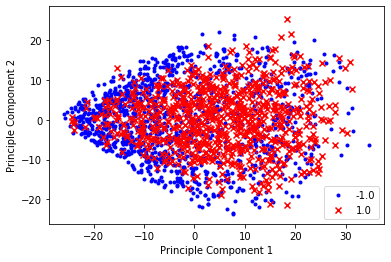

In [38]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_train_scale,Ytrain,test_size=0.33, random_state=42)
#initialsing pca 
pca = PCA(n_components = 2)
pca.fit(X_train)# fit on scaled data and transform data
#Apply the mapping to the training data 
train_pca_data = pca.transform(X_train)
#generating the coordinates for pca graph based on loading scores and the scaled data
test_pca_data = pca.transform(X_val)
print("Explained variance ratio of two components:",pca.explained_variance_ratio_)
#scatter plot of training data  of 2 components
colors = ['b', 'r']
markers = ['.', 'x']
for l, c, m in zip(np.unique(y_val), colors, markers):
    plt.scatter(train_pca_data [y_train==l, 0], 
                train_pca_data [y_train==l, 1], 
                c=c, label=l, marker=m) 
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend(loc='lower right')
plt.show()

<b>What are the obeservation based on data ?</b>


<ul>
<li>We can observe that data is more spread out along the x - axis than y - axis . 
<li>And, we can identify that a linear classifier will not likely be able to separate the classes well because the data is non -linearly seperable
</ul>

<b>Part -2</b>

The screen graph with all the components 

No of components: 784


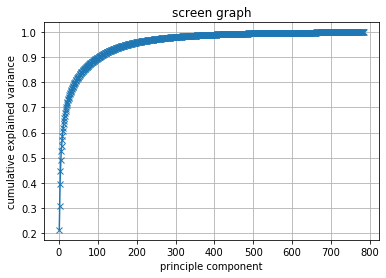

In [39]:
X_train,X_val,y_train,y_val = train_test_split(X_train_scale,Ytrain,test_size=0.33, random_state=42)
pca = PCA()
pca.fit(X_train)# fit on scaled data and transform data
#Apply the mapping to the training data 
train_pca_data = pca.transform(X_train)
#generating the coordinates for pca graph based on loading scores and the scaled data
test_pca_data = pca.transform(X_val)
print("No of components:", pca.n_components_)#printing the no of components 
#plotting the screen graph with explained variance ratio and number of components
plt.plot(np.arange(len(pca.explained_variance_ratio_))+1,np.cumsum(pca.explained_variance_ratio_),'x-')
plt.ylabel('cumulative explained variance')
plt.xlabel('principle component')
plt.title('screen graph')
plt.grid()
plt.show()

Screen graph with reduced number of dimensions of the training data using Principle Component analysis that retains the 95% variance.

No of components selected by pca with 95% variance: 175


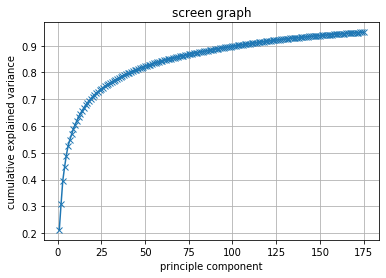

In [40]:
X_train,X_val,y_train,y_val = train_test_split(X_train_scale,Ytrain,test_size=0.33, random_state=42)
pca = PCA(.95)

pca.fit(X_train)# fit on scaled data and transform data
#Apply the mapping to the training data 
train_pca_data = pca.transform(X_train)
#generating the coordinates for pca graph based on loading scores and the scaled data
test_pca_data = pca.transform(X_val)
print("No of components selected by pca with 95% variance:", pca.n_components_)
# calculating the percentage of variation that pca accounts for
plt.plot(np.arange(len(pca.explained_variance_ratio_))+1,np.cumsum(pca.explained_variance_ratio_),'x-')
plt.ylabel('cumulative explained variance')
plt.xlabel('principle component')
plt.title('screen graph')
plt.grid()
plt.show()

175 components/features in the training dataset has shown the 95% variance.

<b>Part - 3</b>

<b>Kernelised svm with pca</b>

In [41]:
#GridsearchCV for KernelSVM

In [42]:
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import PCA
# from sklearn import svm

# pipe = Pipeline([
#     ('pca', PCA()),
#     ('clf', svm.SVC()),
# ])

# parameters = {
#     'pca__n_components': [175,250,350],
#      'clf__C': [0.1, 1,5, 10,50, 100, 1000],'clf__gamma':[1, 0.1, 0.01, 0.001, 0.0001,0.0005],'clf__kernel':['rbf','poly']
#     }

# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# kf = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)

# gs = GridSearchCV(pipe, parameters, cv=kf, n_jobs=-1, verbose=1)
# gs.fit(X_train_scale,Ytrain)

# print("Best score: %0.3f" % gs.best_score_)
# print("Best parameters set:")
# best_parameters = gs.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#     print("\t%s: %r" % (param_name, best_parameters[param_name]))

When grid search cv was performed on svm with priniciple component analysis of various n components and with different parameters of SVM 
The optimised results were shown below .
<br>
Best parameters set:
    <br>
	clf__C: 5
    <br>
	clf__gamma: 0.005
    <br>
	clf__kernel: 'rbf'
    <br>
	pca__n_components: 250

Accuracy score: 0.7853577371048253


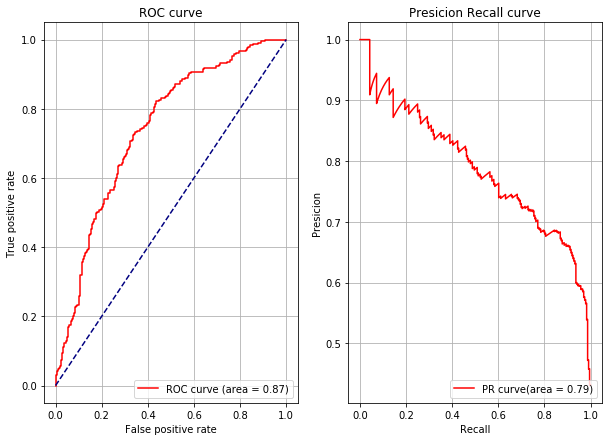

---------------------------END OF FOLD 0 ----------------------------------
Accuracy score: 0.7966666666666666


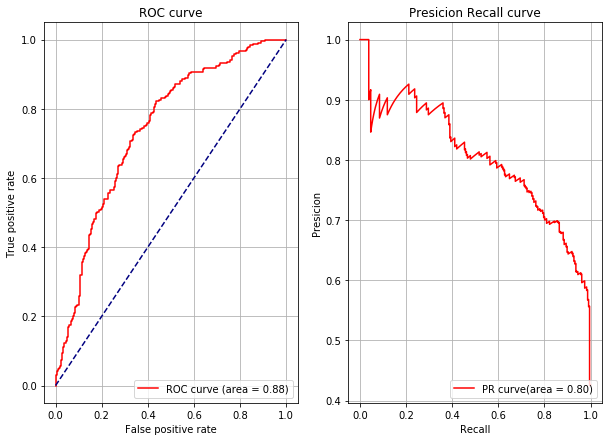

---------------------------END OF FOLD 1 ----------------------------------
Accuracy score: 0.805


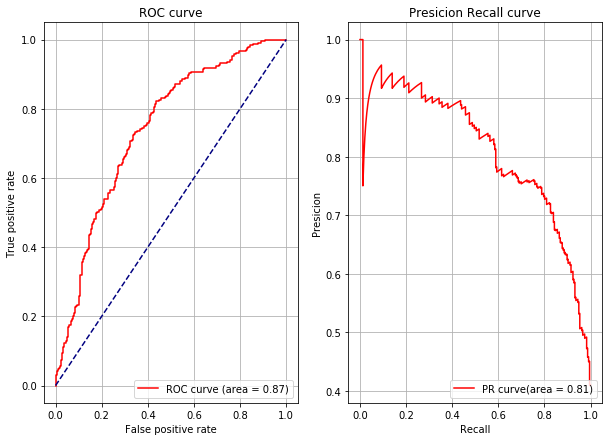

---------------------------END OF FOLD 2 ----------------------------------
Accuracy score: 0.7766666666666666


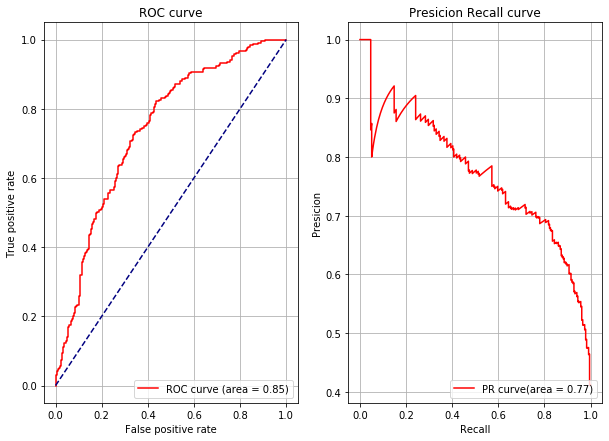

---------------------------END OF FOLD 3 ----------------------------------
Accuracy score: 0.7629382303839732


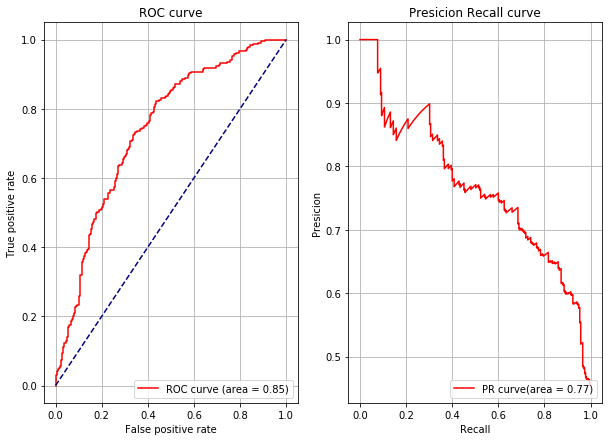

---------------------------END OF FOLD 4 ----------------------------------


In [43]:
from sklearn.svm import SVC
import itertools
accscore_kernelsvc = []
roccurve_kernelsvc = []
prcurve_kernelsvc = []
recall_svm = []
false_pr_svm =[]
true_pr_svm = []
precision_svm = []

#splitting the training data into train and validation set using stratified five fold cross validation
skfold = StratifiedKFold(n_splits=5,random_state=None, shuffle=True)
for train_index, test_index in skfold.split(X_train_scale,Ytrain):
    X_train, X_val, y_train, y_val = X_train_scale[train_index], X_train_scale[test_index], Ytrain[train_index], Ytrain[test_index]
    
    #Choosing principal components
    pca = PCA(n_components = 250) 
    X_train = pca.fit_transform(X_train)
    X_val = pca.transform(X_val)
    #Create classifier object
    classifier_svm_kernel = SVC(C = 5, gamma = 0.0005, kernel = 'rbf')
    classifier_svm_kernel.fit(X_train,y_train)
    sv = classifier_svm_kernel.support_vectors_
    #predict on validation set 
    y_pred = classifier_svm_kernel.predict(X_val)
    accscore_kernelsvc.append(accuracy_score(y_pred,y_val))
    #desicion function
    proba_svc =classifier_svm_kernel.decision_function(X_val)
    #calculating the auc-roc curve
    false_positive_rate_svm,true_positive_rate_svm, threshold = roc_curve(y_val,proba_svc)
    false_pr_svm.append(false_positive_rate)#appending false positive rate
    true_pr_svm.append(true_positive_rate)#appending true positive rate
    roccurve_kernelsvc.append(auc(false_positive_rate_svm,true_positive_rate_svm))
     #calculating auc - pr curve
    precision, recall, thresholds = precision_recall_curve(y_val,proba_svc)
    prcurve_kernelsvc.append(average_precision_score(y_val, proba_svc))
    recall_svm.append(recall)
    precision_svm.append(precision)
for i in range(len(accscore_kernelsvc)) :
    #iterating over the range of items in list and plotting the graphs of ROC -AUC and AUC - PR
    print("Accuracy score:",accscore_kernelsvc[i])
    plt.figure(figsize = (10,7))
    
    plt.subplot(1,2,1)#ROC - AUC curve 
    plt.plot(false_pr_svm[i],true_pr_svm[i],color='red',label='ROC curve (area = %0.2f)' % roccurve_kernelsvc[i])
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title('ROC curve')
    plt.legend(loc = "lower right")
    plt.grid()
    
    plt.subplot(1,2,2)#AUC - PR plot
    plt.plot(recall_svm[i],precision_svm[i],color='red',label='PR curve(area = %0.2f)' % prcurve_kernelsvc[i])
    plt.xlabel("Recall")
    plt.ylabel("Presicion")
    plt.title('Presicion Recall curve')
    plt.legend(loc = "lower right")
    plt.grid()
    plt.show()
    
    print("---------------------------END OF FOLD",i,"----------------------------------")



In [44]:
print("------------------------Mean---------------------------")
print("Mean predicted accuracy:",st.mean(accscore_kernelsvc))
print("Mean ROC - AUC score",st.mean(roccurve_kernelsvc))
print("Mean AUC - PR score",st.mean(prcurve_kernelsvc))
print("----------------------Standard deviation----------------")
print("Standard deviation of predicted accuracy:",st.stdev(accscore_kernelsvc))
print("Standard deviation of ROC - AUC score",st.stdev(roccurve_kernelsvc))
print("Standard deviation of AUC - PR score",st.stdev(prcurve_kernelsvc))

------------------------Mean---------------------------
Mean predicted accuracy: 0.7853258601644264
Mean ROC - AUC score 0.8652109585132521
Mean AUC - PR score 0.7886341452248763
----------------------Standard deviation----------------
Standard deviation of predicted accuracy: 0.016521760542906497
Standard deviation of ROC - AUC score 0.014108182140010871
Standard deviation of AUC - PR score 0.018882280377548362


<b>XGBoost with Priniciple component Analaysis</b>

In [45]:
#Gridsearch CV for XGB classifier

In [46]:
# import xgboost as xgb
# from xgboost import XGBClassifier
# from sklearn.pipeline import Pipeline

# pipe = Pipeline([
#     ('pca', PCA()),
#     ('clf', xgb.XGBClassifier()),
# ])

# parameters = {
#     'pca__n_components': [459,178,250],
#      'clf__max_depth':[7,8,10,12,15],'clf__min_child_weight' :[5,6,7,8],'clf__learning_rate':[0.05 , 0.01, 0.001,0.005]
# }


# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# gs = GridSearchCV(pipe, parameters, cv=kf, n_jobs=-1, verbose=1)
# gs.fit(Xtrain,Ytrain)

# print("Best score: %0.3f" % gs.best_score_)
# print("Best parameters set:")
# best_parameters = gs.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#     print("\t%s: %r" % (param_name, best_parameters[param_name]))

Preprocessing techniques weren't used on XGBoost classifier because XGBoost doesn't need data to be scaled ,
<br>
When GridSearch CV was performed to find the optimal parameters of XGB classifier and optimal principal analysis components .
<br>
The below parameters were best estimators with the score  of 0.798
<br>
max_depth= 10, learning_rate=0.05, objective="binary:logistic",colsample_bytree=0.3, n_estimators=500,min_child_weight = 1,,gamma = 1,reg_alpha = 0

Accuracy score 0.8136439267886856


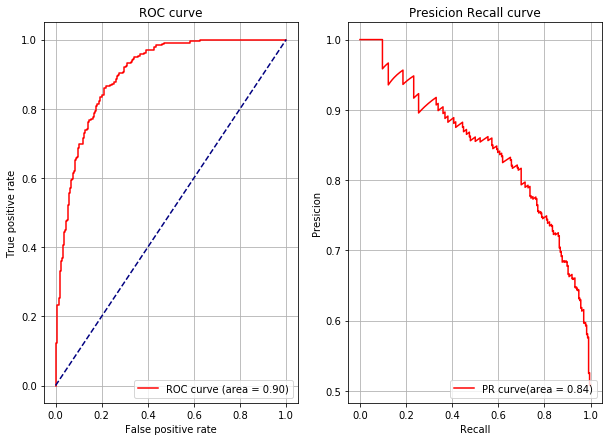

---------------------------END OF FOLD 0 ----------------------------------
Accuracy score 0.7933333333333333


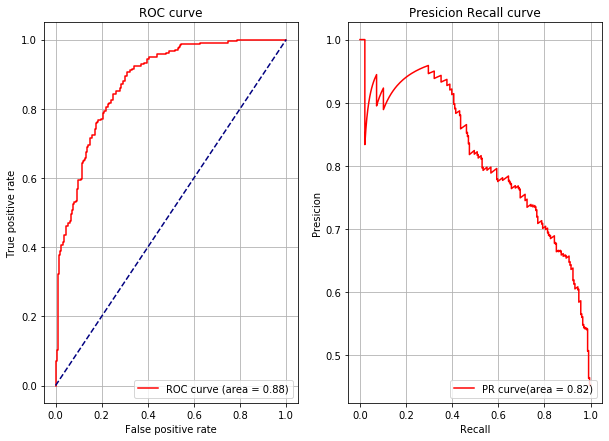

---------------------------END OF FOLD 1 ----------------------------------
Accuracy score 0.7916666666666666


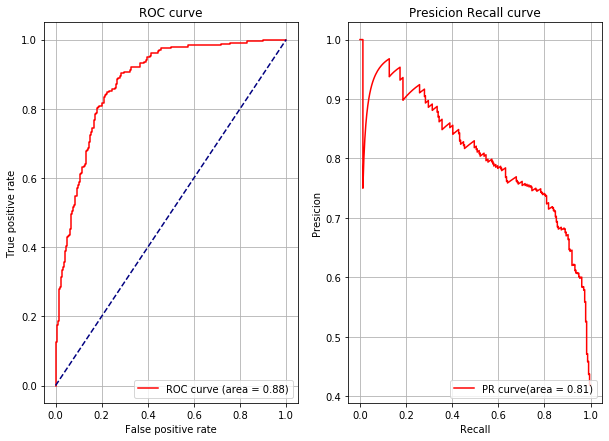

---------------------------END OF FOLD 2 ----------------------------------
Accuracy score 0.78


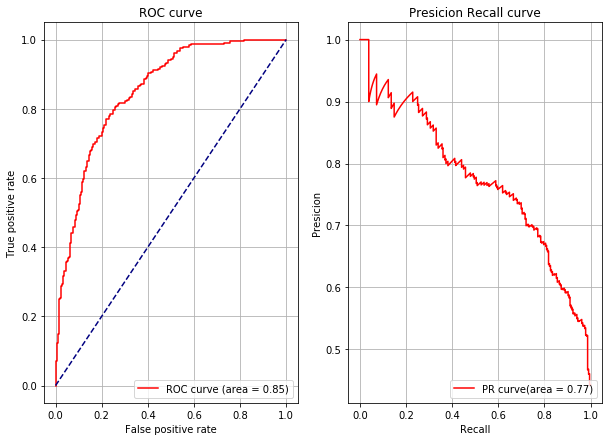

---------------------------END OF FOLD 3 ----------------------------------
Accuracy score 0.7779632721202003


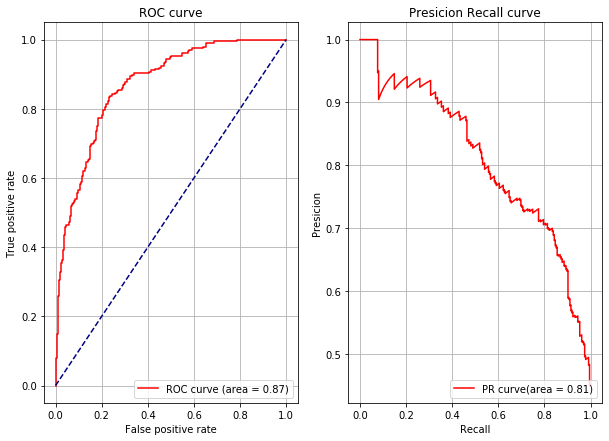

---------------------------END OF FOLD 4 ----------------------------------


In [47]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import auc,accuracy_score,classification_report,roc_curve,roc_auc_score,precision_recall_curve,average_precision_score
import matplotlib.pyplot as plt
%matplotlib inline

accscore_xgb = []
roccurve_xgb = []
prcurve_xgb = []
recall_xgb = []
false_pr_xgb =[]
true_pr_xgb = []
precision_xgb = []


skfold = StratifiedKFold(n_splits=5,random_state=None, shuffle=True)
#splitting the training data into train and validation set using stratified five fold cross validation
for train_index, test_index in skfold.split(Xtrain,Ytrain):
    X_train, X_val, y_train, y_val = Xtrain[train_index],Xtrain[test_index], Ytrain[train_index], Ytrain[test_index]
    
    #Choosing the best principal components
    pca = PCA(n_components = 178) 
    X_train = pca.fit_transform(X_train)
    X_val = pca.transform(X_val)
    
    #Create classifier object with optimal parameters.

    xgb_model = xgb.XGBClassifier(max_depth= 10, learning_rate=0.05, objective="binary:logistic",
                  colsample_bytree=0.3, n_estimators=500,min_child_weight = 1,gamma = 1,reg_alpha = 0)
    
    
    xgb_model.fit(X_train, y_train)

    #predict on validation set 
    y_pred = xgb_model.predict(X_val)
    accscore_xgb.append(accuracy_score(y_pred,y_val))
    #desicion function
    proba_xgb =  xgb_model.predict_proba(X_val)[:,1]
    #calculating the ROC - AUC score
    false_positive_rate_xgb,true_positive_rate_xgb, threshold = roc_curve(y_val,proba_xgb)
    false_pr_xgb.append(false_positive_rate_xgb) #appending false positive rate
    true_pr_xgb.append(true_positive_rate_xgb)#appending true positive rate
    roccurve_xgb.append(auc(false_positive_rate_xgb,true_positive_rate_xgb))
    #calculating the AUC - PR score
    precision_xb,recall_xb,thresholds = precision_recall_curve(y_val,proba_xgb)
    recall_xgb.append(recall_xb)#appending recall
    precision_xgb.append(precision_xb)#appending presicion
    prcurve_xgb.append(average_precision_score(y_val, proba_xgb))
    
for i in range(len(accscore_xgb)) :
    #iterating over the range of items in list and plotting the graphs of ROC -AUC and AUC - PR
    print("Accuracy score",accscore_xgb[i])
    plt.figure(figsize = (10,7))
    
    plt.subplot(1,2,1)#ROC - AUC curve 
    plt.plot(false_pr_xgb[i],true_pr_xgb[i],color='red',label='ROC curve (area = %0.2f)' % roccurve_xgb[i])
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title('ROC curve')
    plt.legend(loc = "lower right")
    plt.grid()
    
    plt.subplot(1,2,2)#AUC - PR plot
    plt.plot(recall_xgb[i],precision_xgb[i],color='red',label='PR curve(area = %0.2f)' % prcurve_xgb[i])
    plt.xlabel("Recall")
    plt.ylabel("Presicion")
    plt.title('Presicion Recall curve')
    plt.legend(loc = "lower right")
    plt.grid()
    plt.show()
    
    print("---------------------------END OF FOLD",i,"----------------------------------")
    

<b> Mean and standard deviation of XGB classifier performance metrics</b>

In [48]:
import statistics as st
print("------------------------Mean---------------------------")
print("Mean predicted accuracy of XGB classifier:",st.mean(accscore_xgb))
print("Mean ROC - AUC score of XGB classifier",st.mean(roccurve_xgb))
print("Mean AUC - PR score of XGB classifier",st.mean(prcurve_xgb))
print("----------------------Standard deviation----------------")
print("Standard deviation of XGB classifier predicted accuracy:",st.stdev(accscore_xgb))
print("Standard deviation of XGB classifier ROC - AUC score",st.stdev(roccurve_xgb))
print("Standard deviation of XGB classifier AUC - PR score",st.stdev(prcurve_xgb))

------------------------Mean---------------------------
Mean predicted accuracy of XGB classifier: 0.7913214397817772
Mean ROC - AUC score of XGB classifier 0.8763604521710203
Mean AUC - PR score of XGB classifier 0.8107626641593092
----------------------Standard deviation----------------
Standard deviation of XGB classifier predicted accuracy: 0.014222130338363885
Standard deviation of XGB classifier ROC - AUC score 0.0187271257723545
Standard deviation of XGB classifier AUC - PR score 0.024705500885920408


<b>Note:</b>  
As per the above models(SVM and XGBoost) performance metrics . It can identified that Both models performed similarly in identifying the classes.
It can also be observed that ROC - AUC score and AUC - PR is higher than accuarcy . 
<br>
It can be due to the accuracy is calculated based on a specific threshold value.

ROC - AUC score for the above model indicates that the model is able to achieve better performance on seperating positive classes well with high false negative rate or low true negatives.

In general ,AUC - PR tells us that how well the postive classes are predicted as postive .

Thus,the performance metrics suggests that both models might have high false negative rate , that decreases the accuracy values even though positive classes are predicted correctly.

<h4>Question - 5</h4>

Pipeline with (PCA,XGBClassifier) 

GridsearchCV to find the optimal n_components of pca with stratified 5 fold cross validation

<b>XGB pipeline</b>

In [49]:
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

#specifying the steps to perfrom in pipe line
#2.Dimensionality reduction with PCA
#3.Classifier
steps = [
         ('pca', PCA()),
         ('clf', XGBClassifier(max_depth= 10, learning_rate=0.05, objective="binary:logistic",
                  colsample_bytree=0.3, n_estimators=500,min_child_weight = 1))]

# Setup the pipeline
pipeline = Pipeline(steps)


# Specify the hyperparameter space
parameters = {
    'pca__n_components': [178,250,459]

    }

# split the train dataset into train and validation sets
sk_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)

    
# Instantiate the GridSearchCV object to select the optimal parameters
cvs  = GridSearchCV(pipeline,parameters,cv=sk_fold, verbose=1,refit=True)
#refit method helps us to refit on entire training data using optimal value and best settings 
# Fit to the training set
cvs.fit(Xtrain,Ytrain)

# Predict the labels of the test set: y_pred
y_pred = cvs.predict(Xtest)

# Compute and create predictions file in csv using to_csv method from pandas 

df = pd.DataFrame(y_pred)#creating a dataframe for predictions on unseen Test data

#df.to_csv('Desktop/u1997603.csv',index=False,header=None)#to_csv methood to export csv file to desktop


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  6.0min finished


df.to_csv('Desktop/u1997603.csv',index=False,header=None),

Since the exported csv file has already been provided in Zip folder with the jupyter notebook .
The above line of code exporting the predictions to csv files is ' commented ',

Pipeline is built with the XGB classifier , that was used in Question 4 .

XGB Classifier with Prinicple component analysis was submitted on competition portal and got accuracy of 79.8 %
It can be concluded that , model has performed fairly reasonable in predicting the classes correctly.